<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.2: K-Means Bad Cases

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [2]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn import datasets
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
## Create data points (circles)

# Make Random Circles
X1, _ = make_circles(n_samples = 400, factor = 0.3, noise = 0.05)

In [7]:
X1

array([[-9.37190875e-01, -2.54965659e-01],
       [ 7.24703539e-01, -6.39597315e-01],
       [-2.17990402e-01, -6.98262787e-02],
       [ 5.56264913e-01, -7.64224499e-01],
       [-1.69958879e-02,  9.29295718e-01],
       [-1.03275397e+00,  1.93754603e-01],
       [ 5.90283106e-01, -6.75938015e-01],
       [-1.90330245e-01,  2.13863084e-01],
       [ 2.59071592e-01,  8.75585199e-01],
       [ 3.39265945e-01,  1.23723393e-01],
       [ 2.13581018e-01,  1.49999801e-01],
       [ 1.66200228e-01,  9.90070062e-01],
       [ 6.10476489e-02,  3.60027528e-01],
       [-4.08942519e-01,  8.91340621e-01],
       [-5.99911382e-01, -8.78453997e-01],
       [-7.33823409e-03,  2.94277378e-01],
       [-1.60529008e-01,  1.42654555e-01],
       [-2.16052528e-01,  2.14457745e-01],
       [-6.98881736e-01, -6.95851314e-01],
       [-2.22651729e-01, -8.28960449e-02],
       [-7.80252343e-01, -8.40735813e-01],
       [-8.36124959e-01,  5.15353280e-01],
       [ 6.03762175e-01, -6.79999588e-01],
       [ 8.

In [4]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'A B'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(X1, columns = columns)

In [5]:
X.head()

,A,B
0,-0.937191,-0.254966
1,0.724704,-0.639597
2,-0.217990,-0.069826
3,0.556265,-0.764224
4,-0.016996,0.929296


In [8]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 400 rows and 2 columns
Basic Statistics about X__________________________________________________
                A           B
count  400.000000  400.000000
mean     0.001630   -0.005804
std      0.525406    0.526547
min     -1.089954   -1.077118
25%     -0.294068   -0.302190
50%     -0.005453   -0.001586
75%      0.287927    0.285075
max      1.056338    1.114042

Sample of X__________________________________________________
          A         B
0 -0.937191 -0.254966
1  0.724704 -0.639597
2 -0.217990 -0.069826
3  0.556265 -0.764224
4 -0.016996  0.929296


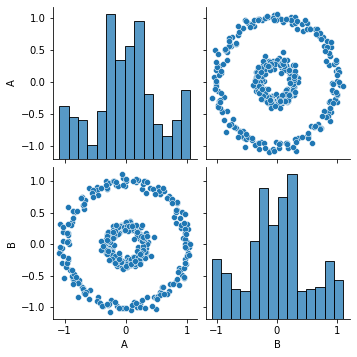

In [9]:
sns.pairplot(X)
plt.show()

### Run the Algoritm: Choose K


In [27]:
def print_centroids(centroids):
    global step
    if show_steps:
        print('(Step) Step %d' % step)
        for c in centroids:
            print(', '.join(['%.3f' % f for f in c]))
        step += 1

In [28]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions
def create_centroids(K, features):
    # start with No centroids
    centroids = []
    # need one centroid for each cluster
    for i in range(K):
        # it can be multi-dimensional
        dimensions = []
        for f in features:
            # create a random number between the minimum and maximum of each feature
            x = np.random.uniform(X[f].min(), X[f].max())
            dimensions.append(x)
        # add all dimensions for the centroids of each cluster
        centroids.append(dimensions)
        
        print_centroids(centroids)

    return centroids

In [29]:
# Identify the closest centroid for a given data point
def closest_centroid(x, centroids):
    distances = []
    # convert x to a numpy.array; x contains all the features of a data point
    p = np.array(x)
    for c in centroids:
        # convert c to a numpy.array; c contains the coordinates for all the features
        q = np.array(c)
        # calculate the Euclidean distance between data point `x` and centroid `c`
        d = np.sqrt( ( (p - q) ** 2 ).sum() )
        # add the distance for each centroid
        distances.append(d)

    # return the position (cluster) which has the smallest distance
    return np.array(distances).argmin()

In [30]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        if X[y == i].shape[0]:
            dimensions = []
            # for all the features
            for f in X.columns:
                # calculate the mean
                x = X[f][y == i].mean()
                dimensions.append(x)
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
            c.append(centroids[i])
            
    print_centroids(centroids)

    return c

In [31]:
# plot a chart of the data points and centroids either generic or identifying the clusters
# NOTE: for visualisation purposes, only consider the first two features
def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')
        
    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    for i in range(len(centroids)):
        for s in range(step + 1):
            e = [z[i][0] for z in centroids_list]
            f = [z[i][1] for z in centroids_list]
            ax.plot(e, f, c = 'k', marker = '+', linewidth = 1)

        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    
    # create a text to show the centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(0.69, -1.1, t)

    ax.legend()

In [32]:
## Flag intermediate output

step = 0
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

(Step) Step 89
-0.088, -0.259
(Step) Step 90
-0.088, -0.259
-0.723, 1.006
(Step) Step 91
-0.088, -0.259
-0.723, 1.006
0.218, -0.017
(Step) Step 92
-0.088, -0.259
-0.723, 1.006
0.218, -0.017
-0.333, -0.457
(Step) Step 93
-0.088, -0.259
-0.723, 1.006
0.218, -0.017
-0.333, -0.457
0.813, -0.437
(Step) Step 94
-0.088, -0.259
-0.723, 1.006
0.218, -0.017
-0.333, -0.457
0.813, -0.437
-0.714, 0.592
(Step) Step 95
-0.088, -0.259
-0.723, 1.006
0.218, -0.017
-0.333, -0.457
0.813, -0.437
-0.714, 0.592
(Step) Step 96
-0.158, -0.132
-0.185, 0.958
0.253, 0.242
-0.477, -0.753
0.805, -0.380
-0.873, 0.360
(Step) Step 97
-0.121, -0.117
-0.077, 0.940
0.292, 0.245
-0.427, -0.804
0.792, -0.403
-0.909, 0.255
(Step) Step 98
-0.106, -0.113
-0.032, 0.934
0.309, 0.247
-0.376, -0.828
0.807, -0.409
-0.912, 0.225
(Step) Step 99
-0.106, -0.106
-0.004, 0.929
0.319, 0.230
-0.355, -0.846
0.812, -0.428
-0.911, 0.194
(Step) Step 100
-0.105, -0.101
0.009, 0.926
0.332, 0.224
-0.355, -0.846
0.808, -0.443
-0.911, 0.194
(Step)

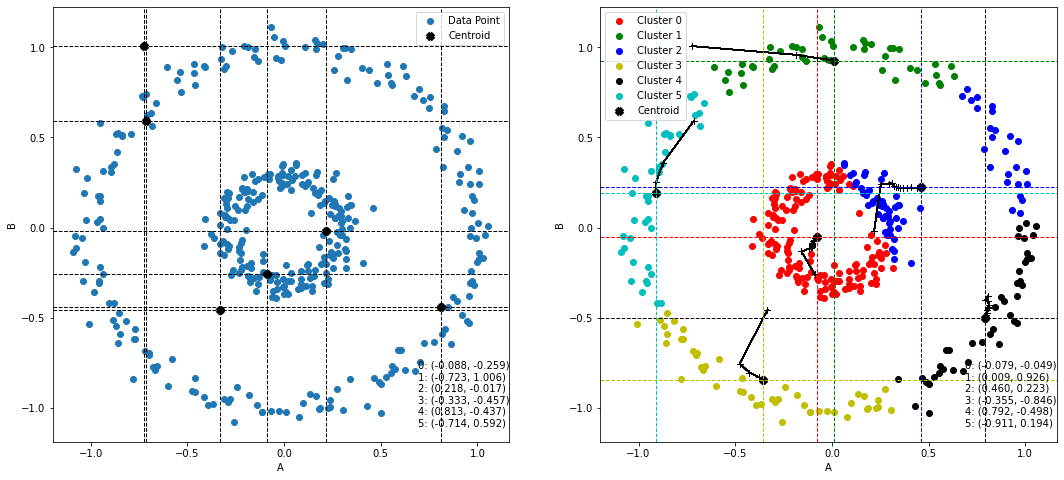

In [37]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 6 # choose different values for `K`

# list the features to be used
features = ['A', 'B']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat util makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum
    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

### Question: What happens if the algorithm is run multiple times?
### Question: What happens if `K` is changed?

##### it gives completely different classification some times

##### the number of clusters increase

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



